In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dehradun_meteo = pd.read_csv('/kaggle/input/uttarakhand-aqi/Uttarakhand/Metrological Dats/Dehradun.csv', skiprows = 2, delimiter=',')
dehradun_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,7.2,86,0.0,939.4,8.5,10.5,308,332
1,2024-01-01T01:00,8.1,94,0.0,941.3,4.7,6.3,329,328
2,2024-01-01T02:00,8.3,94,0.0,941.8,3.3,6.9,332,347
3,2024-01-01T03:00,9.6,87,0.0,942.4,2.2,5.2,335,9
4,2024-01-01T04:00,11.7,83,0.0,942.9,1.4,4.4,325,270
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.4,97,0.0,941.9,1.5,3.1,360,291
8780,2024-12-31T20:00,8.4,96,0.0,941.2,2.7,5.0,360,328
8781,2024-12-31T21:00,8.4,91,0.0,940.6,3.3,6.2,338,319
8782,2024-12-31T22:00,9.0,80,0.0,940.1,3.9,7.5,345,338


In [3]:
dehradun_pollutants = pd.read_csv('/kaggle/input/uttarakhand-aqi/Uttarakhand/Pollutants/Dehradun.csv', delimiter= ',')
dehradun_pollutants['Timestamp'] = dehradun_meteo['time']
dehradun_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
dehradun_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,122.60,134.92,0.24,5.31,5.56,NaN,1.02,2.09,0.03,...,NaN,9.65,99.00,0.49,234.66,NaN,NaN,2.14,806.49,NaN
1,2024-01-01T01:00,114.88,130.00,0.23,4.80,5.03,NaN,1.03,2.03,0.05,...,NaN,9.60,99.54,0.60,184.85,NaN,NaN,1.65,808.07,NaN
2,2024-01-01T02:00,111.74,122.87,0.16,4.56,4.72,NaN,0.99,1.96,0.02,...,NaN,9.54,99.64,0.49,220.11,NaN,NaN,1.60,809.83,NaN
3,2024-01-01T03:00,103.71,109.44,0.20,4.46,4.65,NaN,0.92,1.95,0.02,...,NaN,9.26,99.65,0.99,241.67,NaN,NaN,1.44,810.46,NaN
4,2024-01-01T04:00,91.02,97.88,0.16,4.24,4.40,NaN,0.88,1.82,0.06,...,NaN,8.94,99.66,0.98,236.00,NaN,NaN,1.24,811.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,139.17,174.07,0.16,4.00,4.12,NaN,0.92,1.59,8.94,...,NaN,11.99,92.26,0.49,187.11,NaN,NaN,0.82,800.32,NaN
8780,2024-12-31T20:00,134.52,169.50,0.14,3.16,3.30,NaN,0.84,1.52,10.25,...,NaN,11.45,93.01,1.44,260.87,NaN,NaN,0.78,800.32,NaN
8781,2024-12-31T21:00,105.32,130.52,0.07,2.33,2.38,NaN,0.97,1.41,13.70,...,NaN,11.30,91.28,1.55,263.65,NaN,NaN,0.83,800.32,NaN
8782,2024-12-31T22:00,86.73,103.80,0.07,2.49,2.54,NaN,0.83,1.41,14.16,...,NaN,11.22,89.69,1.28,257.02,NaN,NaN,0.83,800.32,NaN


In [4]:
dehradun = pd.merge(dehradun_meteo.iloc[:, :], dehradun_pollutants.iloc[:, 0:3], on='time')
dehradun

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,7.2,86,0.0,939.4,8.5,10.5,308,332,122.60,134.92
1,2024-01-01T01:00,8.1,94,0.0,941.3,4.7,6.3,329,328,114.88,130.00
2,2024-01-01T02:00,8.3,94,0.0,941.8,3.3,6.9,332,347,111.74,122.87
3,2024-01-01T03:00,9.6,87,0.0,942.4,2.2,5.2,335,9,103.71,109.44
4,2024-01-01T04:00,11.7,83,0.0,942.9,1.4,4.4,325,270,91.02,97.88
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.4,97,0.0,941.9,1.5,3.1,360,291,139.17,174.07
8780,2024-12-31T20:00,8.4,96,0.0,941.2,2.7,5.0,360,328,134.52,169.50
8781,2024-12-31T21:00,8.4,91,0.0,940.6,3.3,6.2,338,319,105.32,130.52
8782,2024-12-31T22:00,9.0,80,0.0,940.1,3.9,7.5,345,338,86.73,103.80


In [5]:
dehradun['city'] = 'Dehradun'
dehradun

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,7.2,86,0.0,939.4,8.5,10.5,308,332,122.60,134.92,Dehradun
1,2024-01-01T01:00,8.1,94,0.0,941.3,4.7,6.3,329,328,114.88,130.00,Dehradun
2,2024-01-01T02:00,8.3,94,0.0,941.8,3.3,6.9,332,347,111.74,122.87,Dehradun
3,2024-01-01T03:00,9.6,87,0.0,942.4,2.2,5.2,335,9,103.71,109.44,Dehradun
4,2024-01-01T04:00,11.7,83,0.0,942.9,1.4,4.4,325,270,91.02,97.88,Dehradun
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.4,97,0.0,941.9,1.5,3.1,360,291,139.17,174.07,Dehradun
8780,2024-12-31T20:00,8.4,96,0.0,941.2,2.7,5.0,360,328,134.52,169.50,Dehradun
8781,2024-12-31T21:00,8.4,91,0.0,940.6,3.3,6.2,338,319,105.32,130.52,Dehradun
8782,2024-12-31T22:00,9.0,80,0.0,940.1,3.9,7.5,345,338,86.73,103.80,Dehradun


In [6]:
dehradun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8280 non-null   float64
 10  PM10 (µg/m³)              8326 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
dehradun = dehradun.interpolate()
dehradun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    dehradun[delay1_col] = dehradun[col].shift(1)
    delay2_col = col + "_delay2"
    dehradun[delay2_col] = dehradun[col].shift(2)
    dehradun.loc[0, delay1_col] = dehradun[col].iloc[-1]
    dehradun.loc[1, delay2_col] = dehradun[col].iloc[-1]
    dehradun.loc[0, delay2_col] = dehradun[col].iloc[-2]

dehradun

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,7.2,86,0.0,939.4,8.5,10.5,308,332,122.60,134.92,Dehradun,86.91,86.73,101.86,103.80
1,2024-01-01T01:00,8.1,94,0.0,941.3,4.7,6.3,329,328,114.88,130.00,Dehradun,122.60,86.91,134.92,101.86
2,2024-01-01T02:00,8.3,94,0.0,941.8,3.3,6.9,332,347,111.74,122.87,Dehradun,114.88,122.60,130.00,134.92
3,2024-01-01T03:00,9.6,87,0.0,942.4,2.2,5.2,335,9,103.71,109.44,Dehradun,111.74,114.88,122.87,130.00
4,2024-01-01T04:00,11.7,83,0.0,942.9,1.4,4.4,325,270,91.02,97.88,Dehradun,103.71,111.74,109.44,122.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.4,97,0.0,941.9,1.5,3.1,360,291,139.17,174.07,Dehradun,123.24,113.56,157.16,144.01
8780,2024-12-31T20:00,8.4,96,0.0,941.2,2.7,5.0,360,328,134.52,169.50,Dehradun,139.17,123.24,174.07,157.16
8781,2024-12-31T21:00,8.4,91,0.0,940.6,3.3,6.2,338,319,105.32,130.52,Dehradun,134.52,139.17,169.50,174.07
8782,2024-12-31T22:00,9.0,80,0.0,940.1,3.9,7.5,345,338,86.73,103.80,Dehradun,105.32,134.52,130.52,169.50


In [9]:
kashipur_meteo = pd.read_csv('/kaggle/input/uttarakhand-aqi/Uttarakhand/Metrological Dats/Kashipur.csv', skiprows=2, delimiter=',')
kashipur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,9.6,89,0.0,989.5,4.4,9.4,310,305
1,2024-01-01T01:00,9.7,96,0.0,990.6,6.6,8.9,313,315
2,2024-01-01T02:00,10.0,96,0.0,991.3,6.6,8.9,313,311
3,2024-01-01T03:00,10.5,98,0.0,991.6,7.6,9.2,315,315
4,2024-01-01T04:00,11.1,97,0.0,992.1,7.9,8.4,313,313
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.1,89,0.0,990.7,8.5,16.4,299,291
8780,2024-12-31T20:00,9.5,95,0.0,989.9,7.5,17.3,290,281
8781,2024-12-31T21:00,8.8,96,0.0,989.3,8.3,19.1,296,292
8782,2024-12-31T22:00,8.9,97,0.0,988.7,7.6,18.3,303,295


In [10]:
kashipur_pollutants = pd.read_csv('/kaggle/input/uttarakhand-aqi/Uttarakhand/Pollutants/Kashipur.csv', delimiter= ',')
kashipur_pollutants['Timestamp'] = kashipur_meteo['time']
kashipur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
kashipur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,64.06,106.09,16.38,35.70,31.12,41.12,5.16,1.21,5.26,...,3.03,12.66,58.91,0.72,270.90,0.0,0.0,3.10,935.88,0.45
8780,2024-12-31T20:00,45.90,76.01,23.86,29.43,35.14,46.07,4.83,1.19,2.32,...,1.97,12.53,59.31,0.60,279.76,0.0,0.0,2.77,936.03,0.45
8781,2024-12-31T21:00,52.60,87.10,19.78,26.61,30.70,40.60,5.31,1.12,4.74,...,2.77,12.48,59.20,0.67,278.16,0.0,0.0,2.88,936.38,0.45
8782,2024-12-31T22:00,53.78,89.06,13.50,18.05,21.79,29.60,5.31,0.95,7.92,...,2.32,12.40,59.19,0.63,267.37,0.0,0.0,2.96,937.20,0.45


In [11]:
kashipur = pd.merge(kashipur_meteo.iloc[:, :], kashipur_pollutants.iloc[:, 0:3], on='time')
kashipur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,9.6,89,0.0,989.5,4.4,9.4,310,305,NaN,NaN
1,2024-01-01T01:00,9.7,96,0.0,990.6,6.6,8.9,313,315,NaN,NaN
2,2024-01-01T02:00,10.0,96,0.0,991.3,6.6,8.9,313,311,NaN,NaN
3,2024-01-01T03:00,10.5,98,0.0,991.6,7.6,9.2,315,315,NaN,NaN
4,2024-01-01T04:00,11.1,97,0.0,992.1,7.9,8.4,313,313,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.1,89,0.0,990.7,8.5,16.4,299,291,64.06,106.09
8780,2024-12-31T20:00,9.5,95,0.0,989.9,7.5,17.3,290,281,45.90,76.01
8781,2024-12-31T21:00,8.8,96,0.0,989.3,8.3,19.1,296,292,52.60,87.10
8782,2024-12-31T22:00,8.9,97,0.0,988.7,7.6,18.3,303,295,53.78,89.06


In [12]:
kashipur['city'] = 'Kashipur'
kashipur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,9.6,89,0.0,989.5,4.4,9.4,310,305,NaN,NaN,Kashipur
1,2024-01-01T01:00,9.7,96,0.0,990.6,6.6,8.9,313,315,NaN,NaN,Kashipur
2,2024-01-01T02:00,10.0,96,0.0,991.3,6.6,8.9,313,311,NaN,NaN,Kashipur
3,2024-01-01T03:00,10.5,98,0.0,991.6,7.6,9.2,315,315,NaN,NaN,Kashipur
4,2024-01-01T04:00,11.1,97,0.0,992.1,7.9,8.4,313,313,NaN,NaN,Kashipur
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.1,89,0.0,990.7,8.5,16.4,299,291,64.06,106.09,Kashipur
8780,2024-12-31T20:00,9.5,95,0.0,989.9,7.5,17.3,290,281,45.90,76.01,Kashipur
8781,2024-12-31T21:00,8.8,96,0.0,989.3,8.3,19.1,296,292,52.60,87.10,Kashipur
8782,2024-12-31T22:00,8.9,97,0.0,988.7,7.6,18.3,303,295,53.78,89.06,Kashipur


In [13]:
kashipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8330 non-null   float64
 10  PM10 (µg/m³)              8159 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
kashipur = kashipur.interpolate()
kashipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8776 non-null   float64
 10  PM10 (µg/m³)              8776 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for column in kashipur.columns:
    kashipur[column].fillna(kashipur[column].mode()[0], inplace=True)

kashipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [16]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    kashipur[delay1_col] = kashipur[col].shift(1)
    delay2_col = col + "_delay2"
    kashipur[delay2_col] = kashipur[col].shift(2)
    kashipur.loc[0, delay1_col] = kashipur[col].iloc[-1]
    kashipur.loc[1, delay2_col] = kashipur[col].iloc[-1]
    kashipur.loc[0, delay2_col] = kashipur[col].iloc[-2]

kashipur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,9.6,89,0.0,989.5,4.4,9.4,310,305,1.83,63.90,Kashipur,49.59,53.78,82.12,89.06
1,2024-01-01T01:00,9.7,96,0.0,990.6,6.6,8.9,313,315,1.83,63.90,Kashipur,1.83,49.59,63.90,82.12
2,2024-01-01T02:00,10.0,96,0.0,991.3,6.6,8.9,313,311,1.83,63.90,Kashipur,1.83,1.83,63.90,63.90
3,2024-01-01T03:00,10.5,98,0.0,991.6,7.6,9.2,315,315,1.83,63.90,Kashipur,1.83,1.83,63.90,63.90
4,2024-01-01T04:00,11.1,97,0.0,992.1,7.9,8.4,313,313,1.83,63.90,Kashipur,1.83,1.83,63.90,63.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.1,89,0.0,990.7,8.5,16.4,299,291,64.06,106.09,Kashipur,70.98,70.96,117.54,117.50
8780,2024-12-31T20:00,9.5,95,0.0,989.9,7.5,17.3,290,281,45.90,76.01,Kashipur,64.06,70.98,106.09,117.54
8781,2024-12-31T21:00,8.8,96,0.0,989.3,8.3,19.1,296,292,52.60,87.10,Kashipur,45.90,64.06,76.01,106.09
8782,2024-12-31T22:00,8.9,97,0.0,988.7,7.6,18.3,303,295,53.78,89.06,Kashipur,52.60,45.90,87.10,76.01


In [17]:
rishikesh_meteo = pd.read_csv('/kaggle/input/uttarakhand-aqi/Uttarakhand/Metrological Dats/Rishikesh.csv', skiprows=2, delimiter=',')
rishikesh_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,8.7,83,0.0,974.0,3.1,1.8,79,36
1,2024-01-01T01:00,9.2,84,0.0,975.8,3.2,2.7,337,360
2,2024-01-01T02:00,9.4,82,0.0,976.3,2.6,1.8,349,16
3,2024-01-01T03:00,11.2,75,0.0,976.7,2.2,1.4,360,9
4,2024-01-01T04:00,13.2,75,0.0,977.1,1.5,0.4,360,225
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.1,99,0.0,976.2,0.5,2.1,322,360
8780,2024-12-31T20:00,8.5,100,0.0,975.6,1.9,5.0,325,343
8781,2024-12-31T21:00,8.8,97,0.0,975.0,0.9,3.3,338,11
8782,2024-12-31T22:00,8.9,94,0.0,974.3,1.3,3.3,351,8


In [18]:
rishikesh_pollutants = pd.read_csv('/kaggle/input/uttarakhand-aqi/Uttarakhand/Pollutants/Rishikesh.csv', delimiter= ',')
rishikesh_pollutants['Timestamp'] = rishikesh_meteo['time']
rishikesh_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
rishikesh_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.57,98.33,8.90,10.80,10.12,31.64,4.56,0.77,7.00,...,0.32,13.02,67.84,0.08,259.11,0.0,0.0,3.49,969.55,0.97
8780,2024-12-31T20:00,23.50,94.52,9.42,10.82,10.54,32.96,4.41,0.80,8.89,...,0.31,13.03,66.28,0.08,259.11,0.0,0.0,3.52,969.55,0.90
8781,2024-12-31T21:00,18.27,93.93,8.77,10.48,9.86,30.80,4.55,0.77,8.93,...,0.34,12.97,66.86,0.08,259.08,0.0,0.0,3.49,970.12,0.79
8782,2024-12-31T22:00,18.29,97.50,8.58,10.21,9.56,29.86,4.64,0.77,8.32,...,0.46,12.87,68.33,0.07,259.04,0.0,0.0,3.48,970.52,0.76


In [19]:
rishikesh = pd.merge(rishikesh_meteo.iloc[:, :], rishikesh_pollutants.iloc[:, 0:3], on='time')
rishikesh

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,8.7,83,0.0,974.0,3.1,1.8,79,36,NaN,NaN
1,2024-01-01T01:00,9.2,84,0.0,975.8,3.2,2.7,337,360,NaN,NaN
2,2024-01-01T02:00,9.4,82,0.0,976.3,2.6,1.8,349,16,NaN,NaN
3,2024-01-01T03:00,11.2,75,0.0,976.7,2.2,1.4,360,9,NaN,NaN
4,2024-01-01T04:00,13.2,75,0.0,977.1,1.5,0.4,360,225,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.1,99,0.0,976.2,0.5,2.1,322,360,25.57,98.33
8780,2024-12-31T20:00,8.5,100,0.0,975.6,1.9,5.0,325,343,23.50,94.52
8781,2024-12-31T21:00,8.8,97,0.0,975.0,0.9,3.3,338,11,18.27,93.93
8782,2024-12-31T22:00,8.9,94,0.0,974.3,1.3,3.3,351,8,18.29,97.50


In [20]:
rishikesh['city'] = 'Rishikesh'
rishikesh

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,8.7,83,0.0,974.0,3.1,1.8,79,36,NaN,NaN,Rishikesh
1,2024-01-01T01:00,9.2,84,0.0,975.8,3.2,2.7,337,360,NaN,NaN,Rishikesh
2,2024-01-01T02:00,9.4,82,0.0,976.3,2.6,1.8,349,16,NaN,NaN,Rishikesh
3,2024-01-01T03:00,11.2,75,0.0,976.7,2.2,1.4,360,9,NaN,NaN,Rishikesh
4,2024-01-01T04:00,13.2,75,0.0,977.1,1.5,0.4,360,225,NaN,NaN,Rishikesh
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.1,99,0.0,976.2,0.5,2.1,322,360,25.57,98.33,Rishikesh
8780,2024-12-31T20:00,8.5,100,0.0,975.6,1.9,5.0,325,343,23.50,94.52,Rishikesh
8781,2024-12-31T21:00,8.8,97,0.0,975.0,0.9,3.3,338,11,18.27,93.93,Rishikesh
8782,2024-12-31T22:00,8.9,94,0.0,974.3,1.3,3.3,351,8,18.29,97.50,Rishikesh


In [21]:
rishikesh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8251 non-null   float64
 10  PM10 (µg/m³)              8282 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
rishikesh = rishikesh.interpolate()
rishikesh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8751 non-null   float64
 10  PM10 (µg/m³)              8751 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [23]:
for column in rishikesh.columns:
    rishikesh[column].fillna(rishikesh[column].mode()[0], inplace=True)

rishikesh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [24]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    rishikesh[delay1_col] = rishikesh[col].shift(1)
    delay2_col = col + "_delay2"
    rishikesh[delay2_col] = rishikesh[col].shift(2)
    rishikesh.loc[0, delay1_col] = rishikesh[col].iloc[-1]
    rishikesh.loc[1, delay2_col] = rishikesh[col].iloc[-1]
    rishikesh.loc[0, delay2_col] = rishikesh[col].iloc[-2]

rishikesh

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.7,83,0.0,974.0,3.1,1.8,79,36,7.00,57.09,Rishikesh,25.49,18.29,85.22,97.50
1,2024-01-01T01:00,9.2,84,0.0,975.8,3.2,2.7,337,360,7.00,57.09,Rishikesh,7.00,25.49,57.09,85.22
2,2024-01-01T02:00,9.4,82,0.0,976.3,2.6,1.8,349,16,7.00,57.09,Rishikesh,7.00,7.00,57.09,57.09
3,2024-01-01T03:00,11.2,75,0.0,976.7,2.2,1.4,360,9,7.00,57.09,Rishikesh,7.00,7.00,57.09,57.09
4,2024-01-01T04:00,13.2,75,0.0,977.1,1.5,0.4,360,225,7.00,57.09,Rishikesh,7.00,7.00,57.09,57.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.1,99,0.0,976.2,0.5,2.1,322,360,25.57,98.33,Rishikesh,20.74,26.16,95.52,97.41
8780,2024-12-31T20:00,8.5,100,0.0,975.6,1.9,5.0,325,343,23.50,94.52,Rishikesh,25.57,20.74,98.33,95.52
8781,2024-12-31T21:00,8.8,97,0.0,975.0,0.9,3.3,338,11,18.27,93.93,Rishikesh,23.50,25.57,94.52,98.33
8782,2024-12-31T22:00,8.9,94,0.0,974.3,1.3,3.3,351,8,18.29,97.50,Rishikesh,18.27,23.50,93.93,94.52


In [25]:
uttarakhand_data = pd.concat([dehradun, kashipur, rishikesh], axis=0, ignore_index=True)
uttarakhand_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,7.2,86,0.0,939.4,8.5,10.5,308,332,122.60,134.92,Dehradun,86.91,86.73,101.86,103.80
1,2024-01-01T01:00,8.1,94,0.0,941.3,4.7,6.3,329,328,114.88,130.00,Dehradun,122.60,86.91,134.92,101.86
2,2024-01-01T02:00,8.3,94,0.0,941.8,3.3,6.9,332,347,111.74,122.87,Dehradun,114.88,122.60,130.00,134.92
3,2024-01-01T03:00,9.6,87,0.0,942.4,2.2,5.2,335,9,103.71,109.44,Dehradun,111.74,114.88,122.87,130.00
4,2024-01-01T04:00,11.7,83,0.0,942.9,1.4,4.4,325,270,91.02,97.88,Dehradun,103.71,111.74,109.44,122.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26347,2024-12-31T19:00,9.1,99,0.0,976.2,0.5,2.1,322,360,25.57,98.33,Rishikesh,20.74,26.16,95.52,97.41
26348,2024-12-31T20:00,8.5,100,0.0,975.6,1.9,5.0,325,343,23.50,94.52,Rishikesh,25.57,20.74,98.33,95.52
26349,2024-12-31T21:00,8.8,97,0.0,975.0,0.9,3.3,338,11,18.27,93.93,Rishikesh,23.50,25.57,94.52,98.33
26350,2024-12-31T22:00,8.9,94,0.0,974.3,1.3,3.3,351,8,18.29,97.50,Rishikesh,18.27,23.50,93.93,94.52


In [26]:
uttarakhand_data['city'] = uttarakhand_data['city'].astype('category')

In [27]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [28]:
X, y = uttarakhand_data[input_cols], uttarakhand_data[target_cols]

In [29]:
from xgboost import XGBRegressor

In [30]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [31]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
pred_check = model.predict(X)

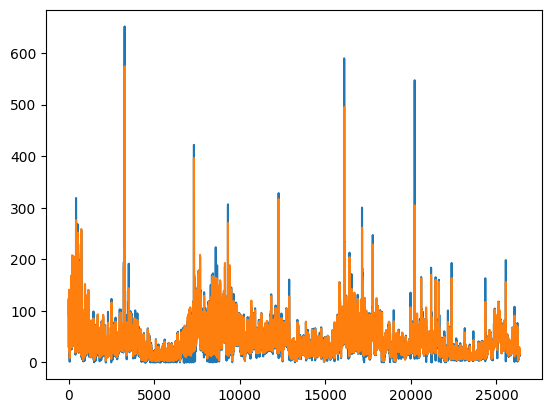

In [33]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.935619542986716


In [35]:
import joblib
joblib.dump(model, 'Uttarakhand_PM25.pkl')

['Uttarakhand_PM25.pkl']

In [36]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
pred_check2 = model.predict(X)

In [38]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9263441171170486


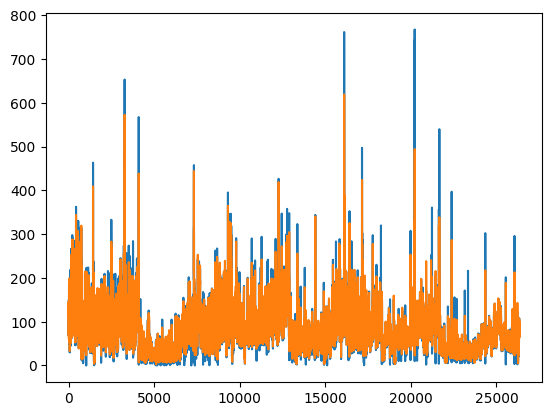

In [39]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [40]:
joblib.dump(model, 'Uttarakhand_PM10.pkl')

['Uttarakhand_PM10.pkl']